# Customer Segmentation using KMeans and DBSCAN

## Objective
The objective of this project is to segment wholesale customers based on their annual spending across different product categories. Two clustering algorithms — KMeans and DBSCAN — are applied and compared to analyze customer grouping behavior.

The analysis includes:
- Exploratory Data Analysis (EDA)
- Skewness handling using log transformation
- Feature scaling
- Clustering using KMeans and DBSCAN
- Cluster comparison

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="whitegrid")

In [106]:
path = '/content/drive/MyDrive/Task2/data/Wholesalecustomersdata.csv'
df = pd.read_csv(path)

print("Data Loaded")

Data Loaded


In [107]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [108]:
df.keys()

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [109]:
df.shape

(440, 8)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [112]:
corr = df.corr()
corr

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [113]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


## Exploratory Data Analysis (EDA)

The dataset consists of annual spending in six product categories:
- Fresh
- Milk
- Grocery
- Frozen
- Detergents_Paper
- Delicassen

EDA is performed to examine feature distributions, detect skewness, identify outliers, and understand relationships between variables.

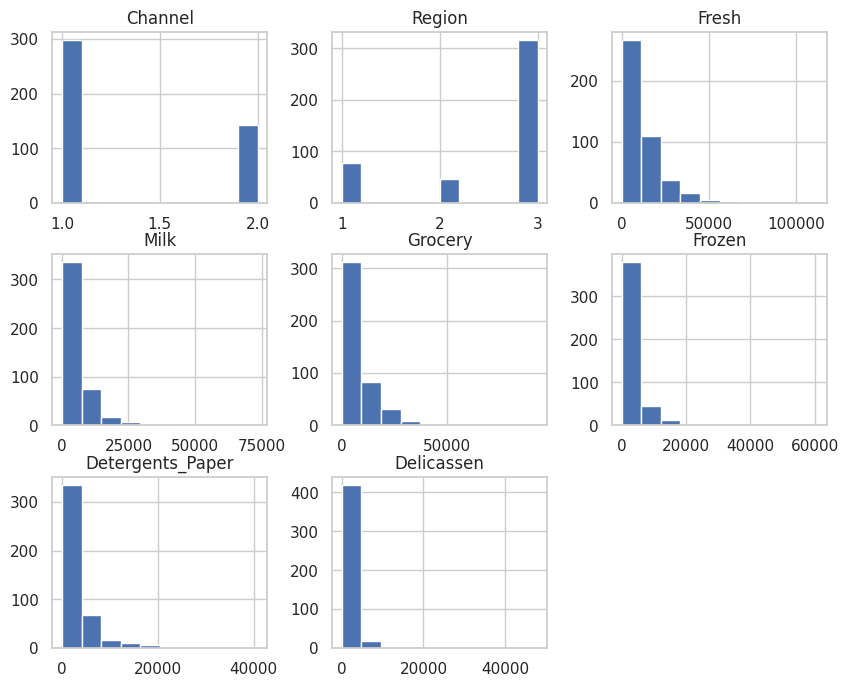

In [114]:
df.hist(figsize=(10,8))
plt.show()

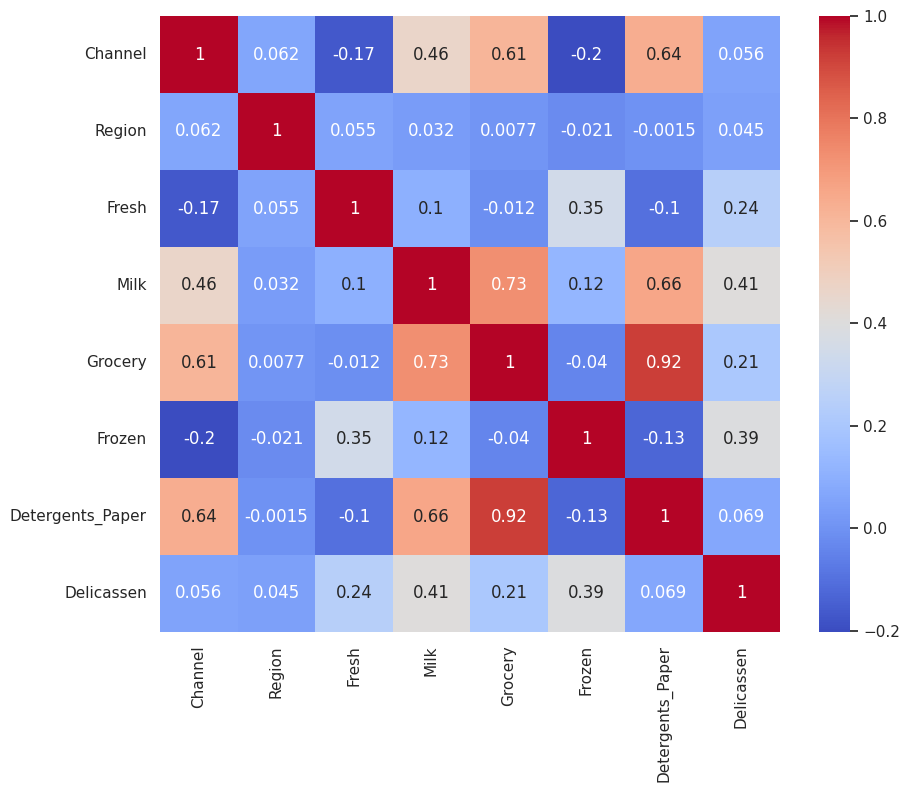

In [115]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

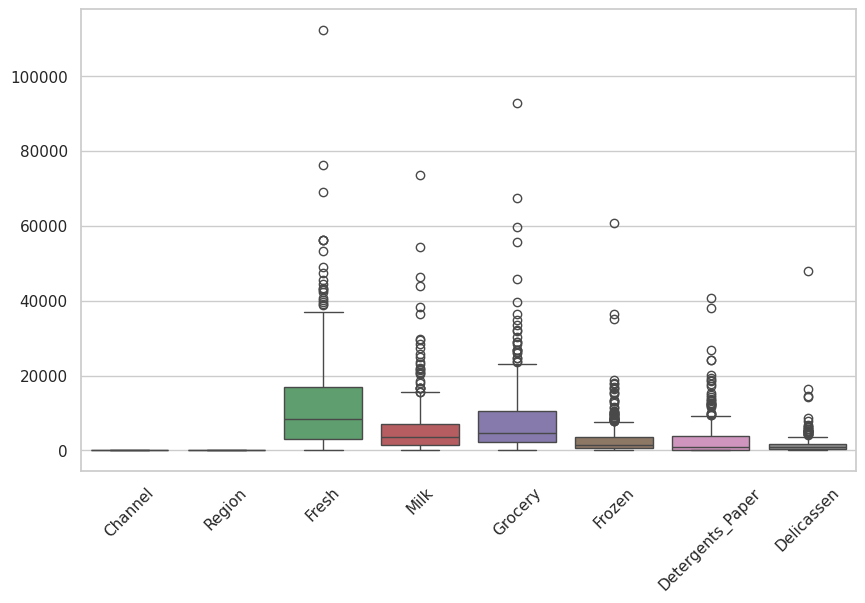

In [116]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

### Skewness Observation

Initial analysis reveals that the spending variables exhibit strong right skewness, indicating the presence of customers with significantly higher expenditures.

Since clustering algorithms such as KMeans and DBSCAN rely on distance calculations, highly skewed data may distort cluster formation. Therefore, a log transformation is applied to reduce skewness and compress extreme values.

In [117]:
df_Copy = df.drop(['Channel','Region'], axis=1)

In [118]:
df_log = np.log1p(df_Copy)

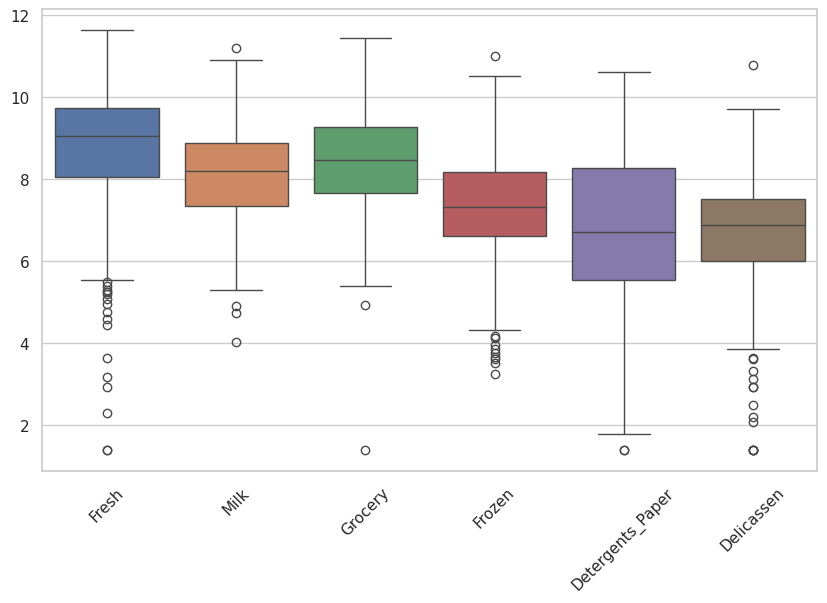

In [119]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_log)
plt.xticks(rotation=45)
plt.show()

### Effect of Log Transformation

After applying log transformation, the magnitude of skewness is substantially reduced across all features. Although minor skewness remains, distributions are now sufficiently balanced for distance-based clustering.

This preprocessing step improves the reliability of subsequent clustering results.

In [120]:
skew_before = df_Copy.skew()
skew_after = df_log.skew()

comparison = pd.DataFrame({
    "Before Log": skew_before,
    "After Log": skew_after
})

comparison

,Before Log,After Log
Fresh,2.561323,-1.575326
Milk,4.053755,-0.224063
Grocery,3.587429,-0.674938
Frozen,5.907986,-0.352655
Detergents_Paper,3.631851,-0.235961
Delicassen,11.151586,-1.091827


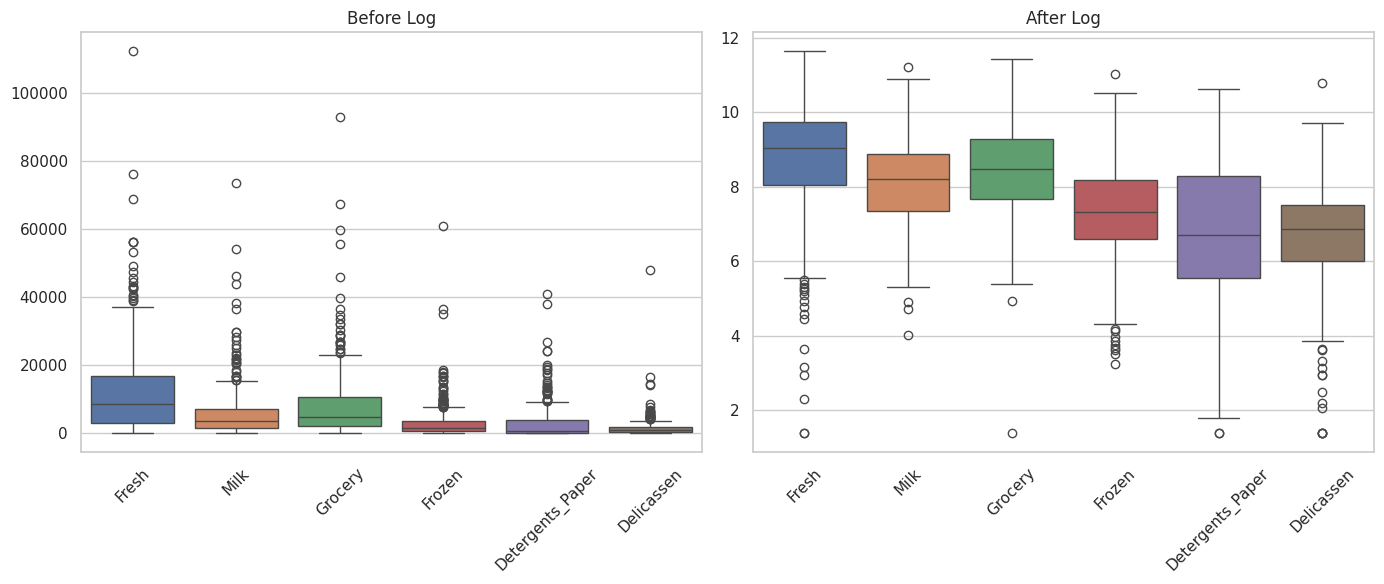

In [121]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(data=df_Copy)
plt.title("Before Log")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(data=df_log)
plt.title("After Log")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Feature Scaling

Since clustering algorithms use Euclidean distance, features must be standardized to ensure equal contribution.

Standardization (mean = 0, standard deviation = 1) is applied to prevent variables with larger magnitudes from dominating distance calculations.

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_log)

## KMeans Clustering

KMeans clustering is applied to segment customers into distinct groups based on spending behavior.

The number of clusters is selected based on prior analysis and model experimentation.

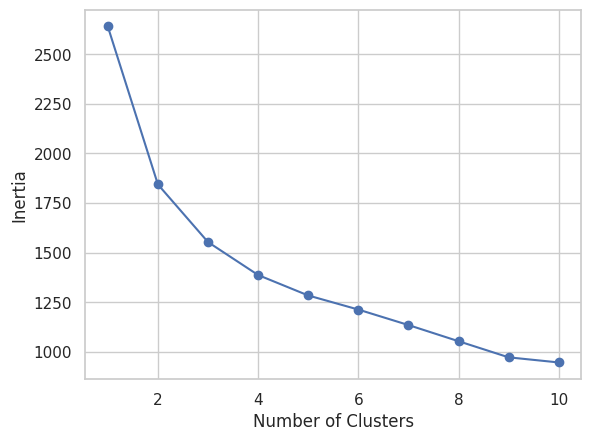

In [123]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [124]:
kmeans = KMeans(n_clusters=3, init='k-means++' ,random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [125]:
df_cluster = df_log.copy()
df_cluster['Cluster'] = y_kmeans
df_cluster.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678,2
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682,2
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632,2
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412,1
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718,2


## Cluster Profiling

Cluster 0 is characterized by high spending in Grocery and Detergents_Paper,
suggesting retail-oriented customers.

Cluster 1 shows significantly higher Fresh spending and lower packaged goods,
indicating fresh-product-focused businesses.

Cluster 2 demonstrates high spending across all categories, representing
large-scale or diversified wholesale customers.

In [126]:
df_profile = df_Copy.copy()
df_profile["Cluster"] = y_kmeans
df_profile.groupby("Cluster").mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,2809.444444,6945.901235,12232.567901,588.123457,5382.851852,782.345679
1,12399.537037,2087.828704,2554.074074,3286.509259,427.435185,919.439815
2,16603.258741,10746.629371,13678.629371,4154.727273,5171.468531,2859.958042


In [127]:
df_cluster.Cluster.value_counts()

,count
Cluster,
1,216
2,143
0,81


In [128]:
kmeans.cluster_centers_

array([[-1.2073481 ,  0.44293053,  0.64174322, -1.15120024,  0.73474595,
        -0.6903529 ],
       [ 0.19788044, -0.70908061, -0.74821724,  0.22513868, -0.74680229,
        -0.18587669],
       [ 0.38498616,  0.8201681 ,  0.7666694 ,  0.31200884,  0.71185225,
         0.67180385]])

In [129]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

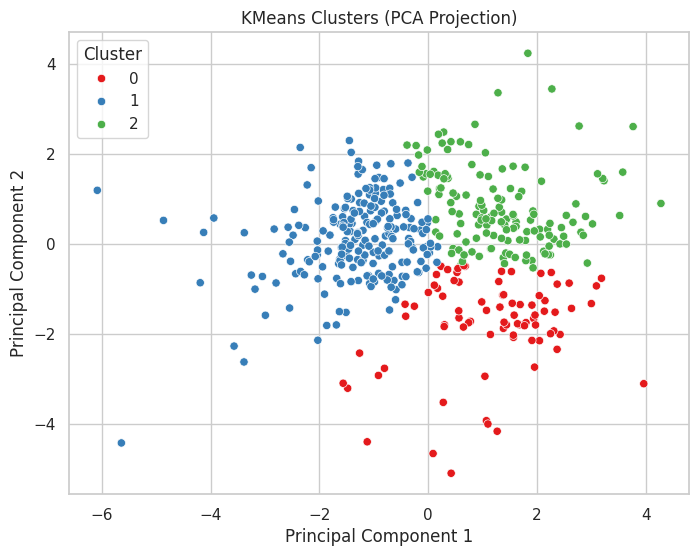

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=y_kmeans,
    palette="Set1"
)

plt.title("KMeans Clusters (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

## 6.1 Cluster Profile Analysis
The radar chart provides a clear visual signature for each customer segment, allowing us to validate the characteristic spending behaviors identified in the mean analysis:

* **Cluster 0 (Retail/Grocery Focus):** This segment is defined by high relative spending in **Grocery** and **Detergents_Paper**. These are likely retail stores or supermarkets that stock non-perishable household goods.
* **Cluster 1 (Horeca/Fresh Focus):** This cluster shows a dominant spike in **Fresh** spending while remaining low in packaged goods. These profiles typically represent hotels, restaurants, or cafes (Horeca) that prioritize fresh ingredients.
* **Cluster 2 (Large-scale/Diversified):** This cluster covers the largest area on the radar chart, indicating significantly high spending across **all product categories** These represent the most valuable, large-scale wholesale customers.


In [139]:

labels = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
stats = df_profile.groupby("Cluster").mean()[labels].values

stats_max = stats.max(axis=0)
stats_normalized = stats / stats_max

labels = np.concatenate((labels, [labels[0]]))

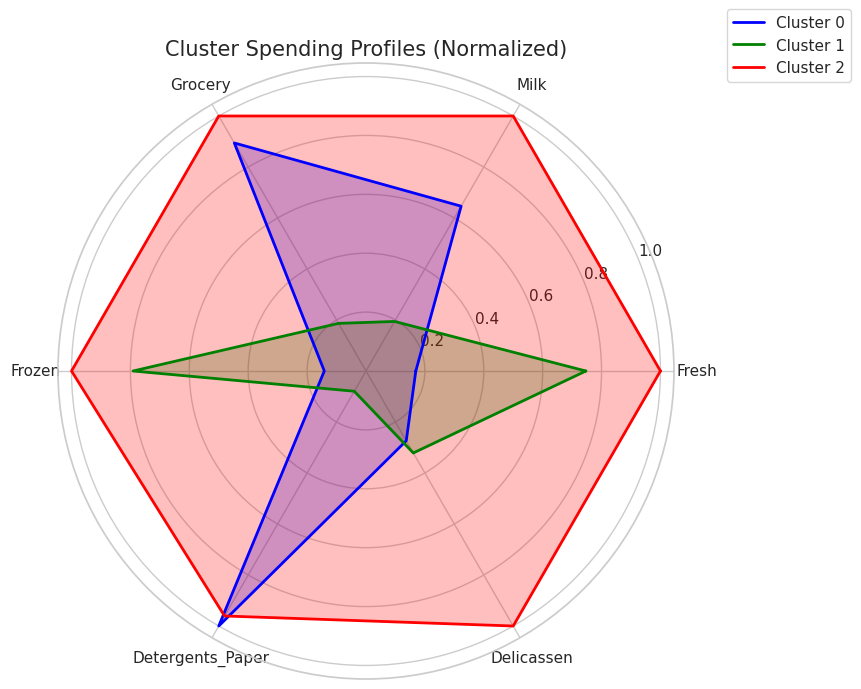

In [140]:
angles = np.linspace(0, 2 * np.pi, len(labels)-1, endpoint=False).tolist()
angles += angles[:1] # Close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['blue', 'green', 'red']
for i in range(len(stats_normalized)):
    data = np.concatenate((stats_normalized[i], [stats_normalized[i][0]]))
    ax.plot(angles, data, color=colors[i], linewidth=2, label=f'Cluster {i}')
    ax.fill(angles, data, color=colors[i], alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels[:-1])
plt.title("Cluster Spending Profiles (Normalized)", size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

## DBSCAN Clustering

DBSCAN is a density-based clustering algorithm that groups closely packed points and identifies sparse regions as noise.

Unlike KMeans, DBSCAN does not require specifying the number of clusters in advance and can detect anomalies within the dataset.

In [131]:
from sklearn.cluster import DBSCAN

In [132]:
outlier_percent = []


for eps in np.linspace(0.001,3,50):
    dbscan = DBSCAN(eps=eps,min_samples=2*X.shape[1])
    dbscan.fit(X)



    perc_out = 100*np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    outlier_percent.append(perc_out)

Text(0.5, 0, 'EPS VALUES')

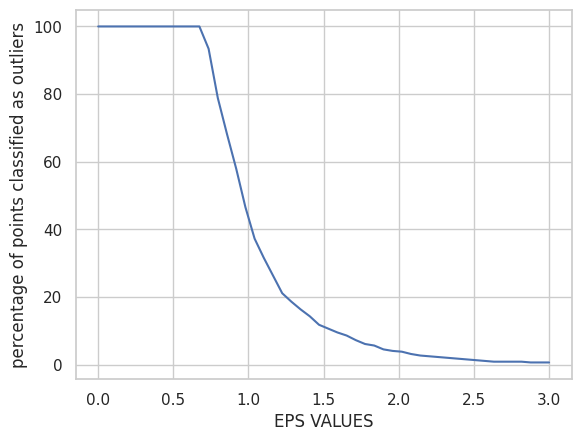

In [133]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel('percentage of points classified as outliers')
plt.xlabel('EPS VALUES')

In [134]:
dbscan = DBSCAN(eps=1.2, min_samples=4)
d_labels = dbscan.fit_predict(X)

In [135]:
np.unique(d_labels)

array([-1,  0,  1,  2])

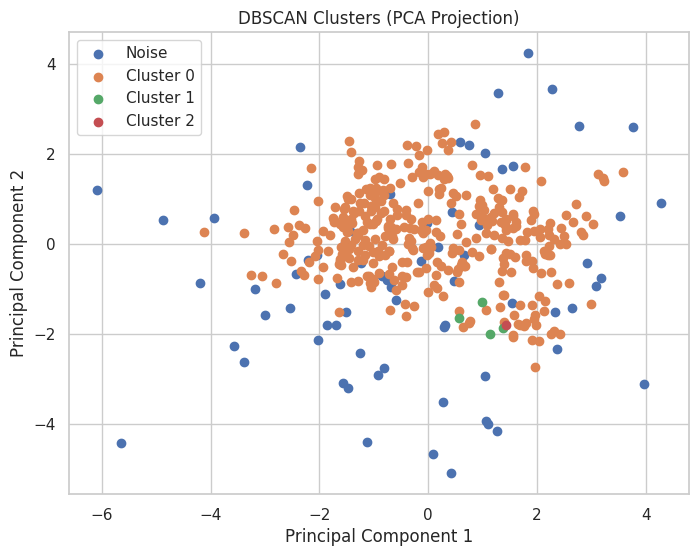

In [136]:
unique_labels = np.unique(d_labels)

plt.figure(figsize=(8,6))

for label in unique_labels:
    if label == -1:
        color = 'black'
        label_name = 'Noise'
    else:
        color = None
        label_name = f'Cluster {label}'

    plt.scatter(
        X_pca[d_labels == label, 0],
        X_pca[d_labels == label, 1],
        label=label_name
    )

plt.title("DBSCAN Clusters (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# ****Evaluation****

using Silhoutte score:

>  Higher = better cluster separation


---





In [137]:
from sklearn.metrics import silhouette_score

print("KMeans:", silhouette_score(X, y_kmeans))

# Remove noise before scoring DBSCAN
mask = d_labels != -1
print("DBSCAN:", silhouette_score(X[mask], d_labels[mask]))

KMeans: 0.2607155784408494
DBSCAN: 0.14362426759586694


## Cluster Size Comparison

The distribution of customers across clusters is examined to understand segmentation balance and identify potential noise points detected by DBSCAN.

In [138]:
kmeans_counts = pd.Series(y_kmeans).value_counts().sort_index()
dbscan_counts = pd.Series(d_labels).value_counts().sort_index()

cluster_comparison = pd.DataFrame({
    "KMeans_Count": kmeans_counts,
    "DBSCAN_Count": dbscan_counts
}).fillna(0)

cluster_comparison["KMeans_%"] = (
    cluster_comparison["KMeans_Count"] / len(y_kmeans) * 100
).round()

cluster_comparison["DBSCAN_%"] = (
    cluster_comparison["DBSCAN_Count"] / len(d_labels) * 100
).round()

cluster_comparison

,KMeans_Count,DBSCAN_Count,KMeans_%,DBSCAN_%
-1,0.0,71,0.0,16.0
0,81.0,364,18.0,83.0
1,216.0,4,49.0,1.0
2,143.0,1,32.0,0.0


## Final Comparison and Conclusion

KMeans assigns all customers into predefined clusters and produces compact, spherical groupings.

DBSCAN identifies density-based clusters and additionally detects noise points representing potentially unique or outlier customers.

Overall, KMeans provides stable segmentation across the dataset, while DBSCAN highlights density variations and anomaly behavior.

The choice between algorithms depends on whether the objective prioritizes structured segmentation (KMeans) or anomaly detection and density analysis (DBSCAN).